## Problem Statement:

We are provided with the data from a premier institute which helps students to crack exams like GMAT,GRE,SAT. They recently launched a feature where students can come to their website and check their probability of getting into a particular college.  We need to find out the factors significant in deciding graduate admission. Or in other words, predict chances of admission of a candidate given values of all the factors.

Concept Used: Linear Regression



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [ ]:
df=pd.read_csv("admission.csv")
df.head()

In [ ]:
df.shape

(500, 9)

Dropping column Serial No. Checking for null values.

In [ ]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Distribution of different variables of graduate applicants

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

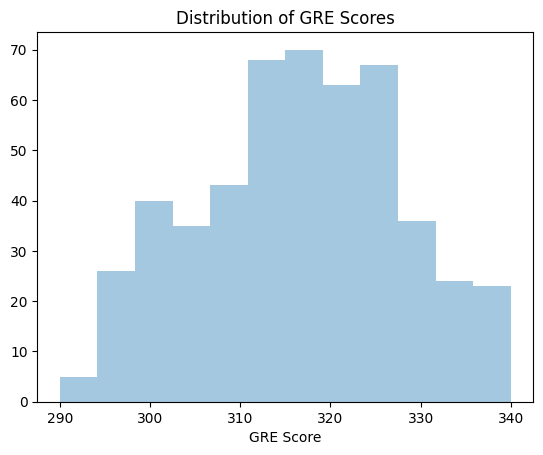

In [ ]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

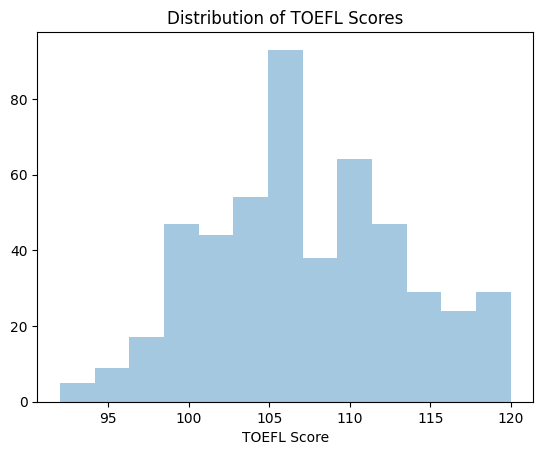

In [ ]:
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

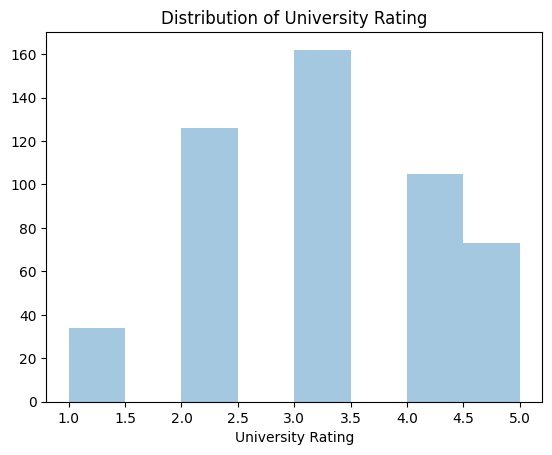

In [ ]:
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

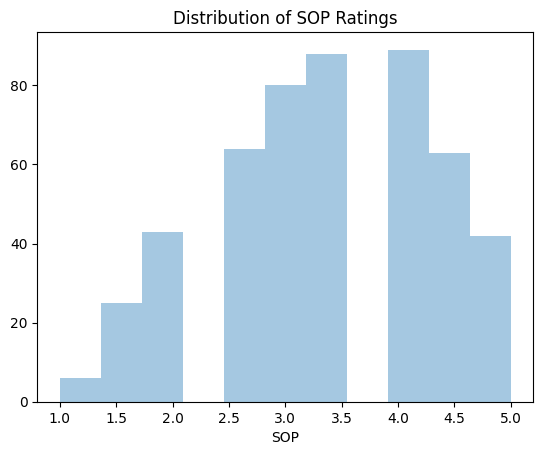

In [ ]:
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

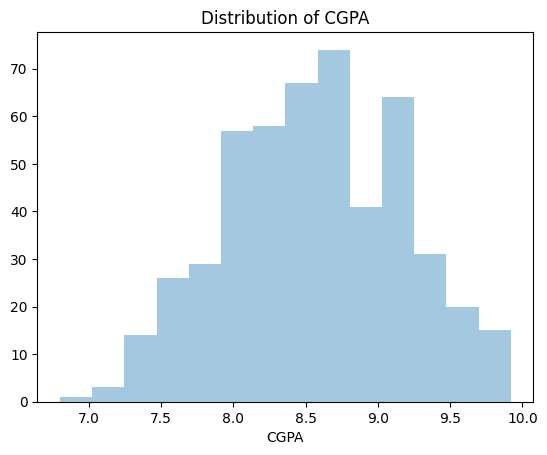

In [ ]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

Its clear from the distributions that students with varied merit apply for the university.

## Understanding relationship between different factors responsible for graduate admissions.

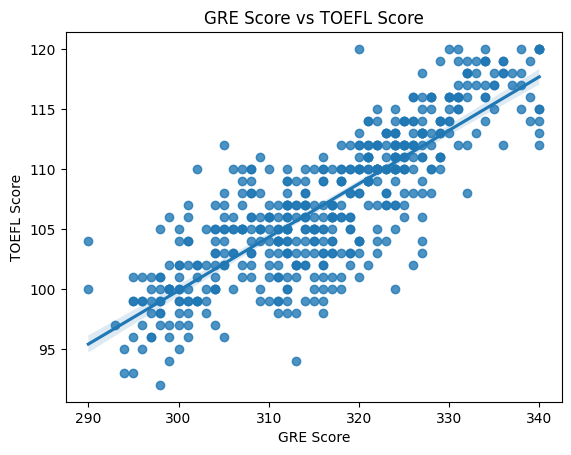

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

From the diagram its clear that people with higher GRE Scores also have higher TOEFL Scores

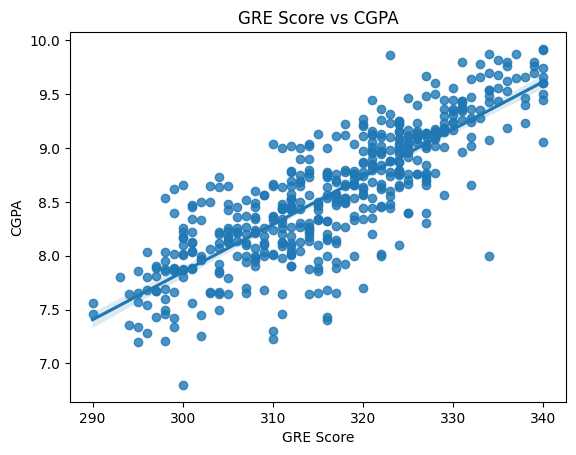

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

In general people with higher CGPA has higher GRE scores.

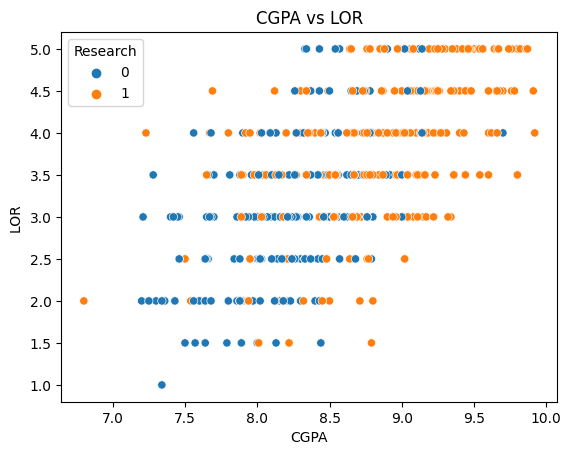

In [ ]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

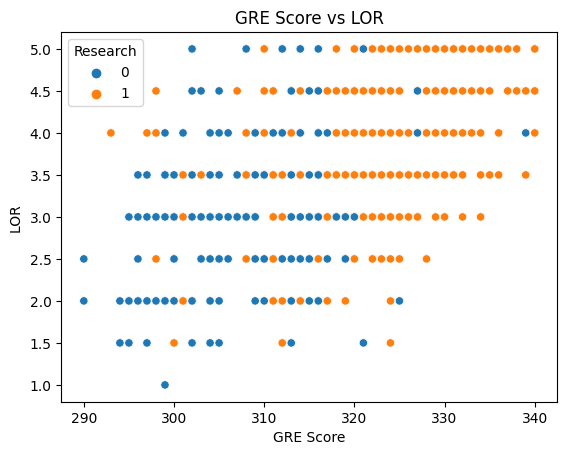

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

Seems like LOR strength is not much related to CGPA or GRE score. Research students have comparitively higher LOR.

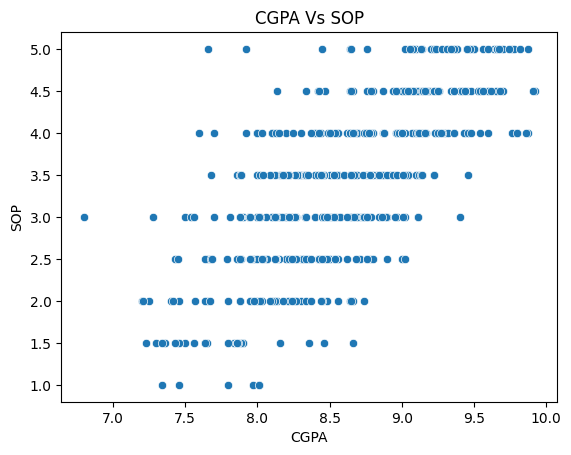

In [ ]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("CGPA Vs SOP")
plt.show()

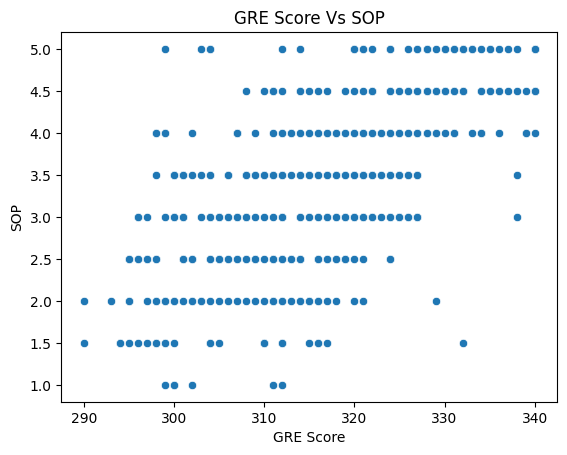

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score Vs SOP")
plt.show()

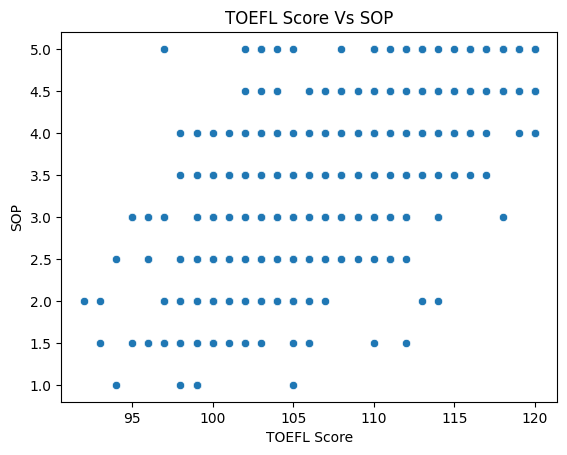

In [ ]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score Vs SOP")
plt.show()

Seems like SOP is not much related to CGPA or GRE score or TOEFL. Students with higher CGPA will definitely have more significant achievements to add in SOP and thus higher SOP strength.

In [ ]:
## Correlation among variables

import numpy as np
corr = df.corr()

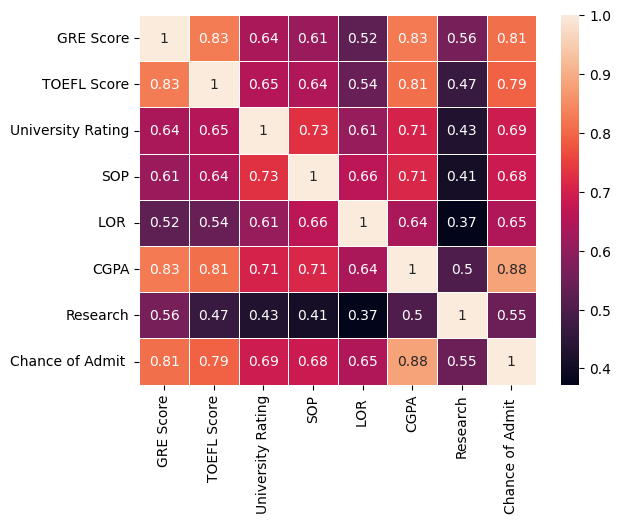

In [ ]:
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

Chance of admission is strongly correlated with GRE score, TOEFL and CGPA.

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, shuffle=True)
print(X_train)
print(y_train)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
457        295           99                  1  2.0   1.5  7.57         0
399        333          117                  4  5.0   4.0  9.66         1
403        330          116                  4  4.0   3.5  9.23         1
262        308          103                  2  2.5   4.0  8.36         1
62         304          105                  2  3.0   3.0  8.20         1
..         ...          ...                ...  ...   ...   ...       ...
363        306          103                  2  2.5   3.0  8.36         0
186        317          107                  3  3.5   3.0  8.68         1
484        317          106                  3  3.5   3.0  7.89         1
146        315          105                  3  2.0   2.5  8.48         0
138        326          116                  2  4.5   3.0  9.08         1

[400 rows x 7 columns]
457    0.37
399    0.95
403    0.91
262    0.70
62     0.54
       ... 
363    0.69
186 

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_train_std

array([[-2.00925608, -1.3922298 , -1.87706195, ..., -2.19822122,
        -1.70052192, -1.15133896],
       [ 1.4895058 ,  1.60718808,  0.77915779, ...,  0.51730839,
         1.78302703,  0.86855395],
       [ 1.21328775,  1.44055375,  0.77915779, ..., -0.02579753,
         1.066316  ,  0.86855395],
       ...,
       [ 0.0163429 , -0.22578951, -0.10624879, ..., -0.56890345,
        -1.16715557,  0.86855395],
       [-0.16780246, -0.39242384, -0.10624879, ..., -1.11200937,
        -0.18376137, -1.15133896],
       [ 0.84499703,  1.44055375, -0.99165537, ..., -0.56890345,
         0.81630052,  0.86855395]])

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-2.009256,-1.392230,-1.877062,-1.427966,-2.198221,-1.700522,-1.151339
1,1.489506,1.607188,0.779158,1.648442,0.517308,1.783027,0.868554
2,1.213288,1.440554,0.779158,0.622972,-0.025798,1.066316,0.868554
3,-0.812311,-0.725692,-0.991655,-0.915231,0.517308,-0.383774,0.868554
4,-1.180602,-0.392424,-0.991655,-0.402497,-0.568903,-0.650457,0.868554
...,...,...,...,...,...,...,...
395,-0.996457,-0.725692,-0.991655,-0.915231,-0.568903,-0.383774,-1.151339
396,0.016343,-0.059155,-0.106249,0.110238,-0.568903,0.149593,0.868554
397,0.016343,-0.225790,-0.106249,0.110238,-0.568903,-1.167156,0.868554
398,-0.167802,-0.392424,-0.106249,-1.427966,-1.112009,-0.183761,-1.151339


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
['Linear Regression :', LinearRegression()],
['Lasso Regression :', Lasso(alpha=0.1)],
['Ridge Regression :', Ridge(alpha=1.0)]
]

In [ ]:
print ("Results without removing features with multicollinearity ...")

for name,model in models:
  model.fit(X_train, y_train.values)
  predictions = model.predict(std.transform(X_test))
  print (name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 0.0587104761234689
Lasso Regression : 0.12412074834328728
Ridge Regression : 0.05870951599249447


Linear regression model is giving the best results.

**Linear Regression using statsmodels**

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     250.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          2.48e-140
Time:                        10:12:25   Log-Likelihood:                 558.58
No. Observations:                 400   AIC:                            -1101.
Df Residuals:                     392   BIC:                            -1069.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7247      0.00

SOP has high P-value. Removing SOP column and running regression.

In [ ]:
X_train_new=X_train.drop(columns='SOP')
model1 = sm.OLS(y_train.values, X_train_new).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     292.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.45e-141
Time:                        10:12:25   Log-Likelihood:                 558.54
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     393   BIC:                            -1075.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7247      0.00

## **Linear regression assumptions check**

**VIF - Checking Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(len(dataset.columns))]
  return vif

calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.325940
2,TOEFL Score,3.893285
3,University Rating,2.290105
4,LOR,1.864206
5,CGPA,4.656861
6,Research,1.465348


In [ ]:
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)
# col name same as train
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))
print(f'Dropping {X_test_del} from test set')
X_test_new=X_test.drop(columns=X_test_del)

#Prediction from the clean model
pred = model1.predict(X_test_new)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print ('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print ('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Dropping ['SOP'] from test set
Mean Absolute Error  0.042227066470138554
Root Mean Square Error  0.058581469339294194


In [ ]:
## Mean of Residuals
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print ("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0042869091645559914


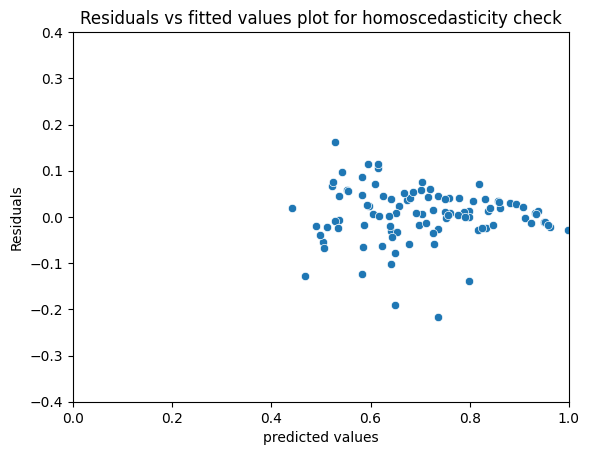

In [ ]:
## Test for Homoscedasticity
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.0300469199591544), ('p-value', 0.4620152036513508)]

Here
null hypothesis
is - error terms are homoscedastic and since p-values >0.05,we fail to reject the null hypothesis

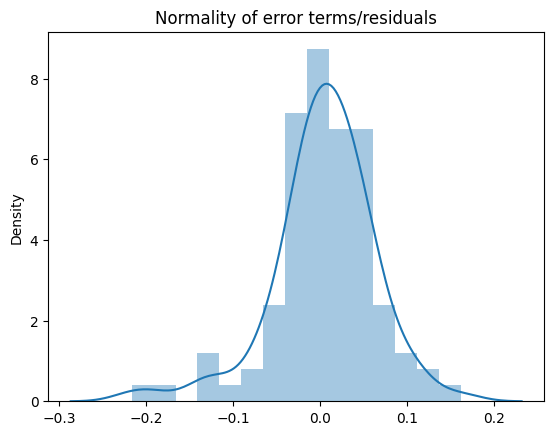

In [ ]:
## Normality of residuals

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

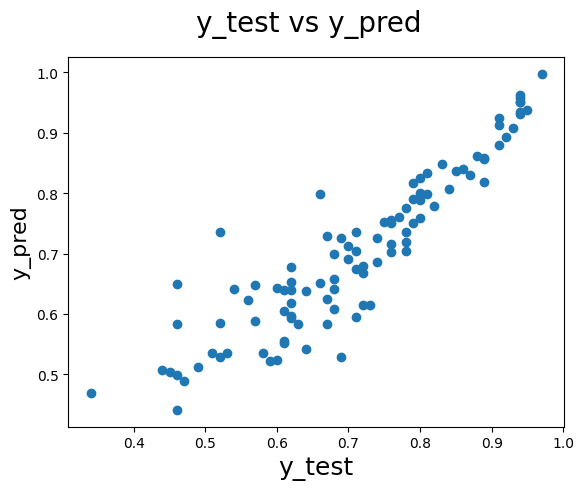

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
# Plot heading
plt.xlabel('y_test', fontsize=18)
# X-label
plt.ylabel('y_pred', fontsize=16)

# Insights

Chance of admission is strongly correlated with GRE score, TOEFL and CGPA.

SOP is not playing a big role in chance of admission.

Good recommendations can improve chance of admission.

# Recommendations

Early applicants to top universities has more chances of admission. Shortlisting the potential candidates and reaching out to them early makes the conversion rate high.

Using data about student's financial status, best college with best scholarship can be recommended.